In [4]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

# Algoritmos de optimización - Seminario<br>
Orlando Urrea Muller:   <br>
Url: https://github.com/orlandourreamuller/03MAIR---Algoritmos-de-optimizacion/tree/master/SEMINARIO<br>
Colab: https://colab.research.google.com/drive/1Gv3IxpV9Hwsh9cI6TEFaPQuHPVPHunVj?usp=sharing <br>

Problema:
**Sesiones de doblaje** <br>

Se precisa coordinar el doblaje de una película. Los actores del doblaje deben coincidir en las 
tomas en las que sus personajes aparecen juntos en las diferentes tomas. Los actores de 
doblaje cobran todos la misma cantidad por cada día que deben desplazarse hasta el estudio de 
grabación independientemente del número de tomas que se graben. No es posible grabar más 
de 6 tomas por día. El objetivo es planificar las sesiones por día de manera que se gasto por los 
servicios de los actores de doblaje sea el menor posible. Los datos son:

Link Archivo Base : https://bit.ly/36D8IuK

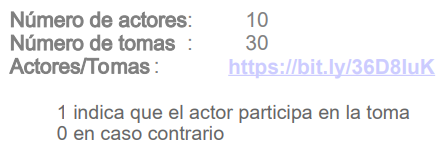

(*) La respuesta es obligatoria





                                        

##Calculo de Posibilidades
(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>
¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.




Sin restricciones de ningun tipo tendriamos 2.05891132094649e+44 posibilidades al permutar con repeticion los 30.

Sin restricciones tendriamos 2.6525285981219103e+32 posibilidades al permutar sin repeticion.

Pero podemos incluir la restriccion de 6 diarias 729.000.000 sin repeticiones.



##Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)


Siento que la mejor estructura de Datos para este problema es Pandas, pues se me hace mas flexible y simple a la hora de trabajar con datos tabulares y aunque numpy es mas optimo en algunas situaciones e indexaciones y demas, en este caso la complejidad no la encontre en la cantidad de datos sino en la forma que se debe abordar el problema para definir un algoritmo que mejore en algo la fuerza bruta.

## Funcion Objetivo
Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?

(*)¿Es un problema de maximización o minimización?

La funcion Objeto del Problema es minimizar el coste que genera hacer el doblaje de una pelicula, entendiendo que la viabilidad de minimizacion esta en poder hacer ir lo menos posible a los actores, bajo las restricciones del ejercicio. Es un problema de minimización.

##Diseña un algoritmo para resolver el problema por fuerza bruta

In [ ]:
'''
class FuerzaBruta:
    from itertools import permutations
    import pandas as pd

    limite_tomas_por_dia = 6
    pago_final_doblaje = 10e100
    sesiones_final_doblaje = list()

    cantidad_iteraciones = 0

    particionado_para_poder_soportar_en_memoria_ram = 5 # 5

    def __init__(self, file):
        self.file = file
        self._leer_archivo()

        tomas_pelicula = self._extraer_tomas()
     
        for i_1 in list(self.permutations(tomas_pelicula.copy(), self.particionado_para_poder_soportar_en_memoria_ram)):
            for i_2 in list(self.permutations(self.items_restantes(tomas_pelicula, i_1), self.particionado_para_poder_soportar_en_memoria_ram)):
                for i_3 in list(self.permutations(self.items_restantes(tomas_pelicula, i_1 + i_2), self.particionado_para_poder_soportar_en_memoria_ram)):
                    for i_4 in list(self.permutations(self.items_restantes(tomas_pelicula, i_1 + i_2 + i_3), self.particionado_para_poder_soportar_en_memoria_ram)):
                        for i_5 in list(self.permutations(self.items_restantes(tomas_pelicula, i_1 + i_2 + i_3 + i_4), self.particionado_para_poder_soportar_en_memoria_ram)):
                            for i_6 in list(self.permutations(self.items_restantes(tomas_pelicula, i_1 + i_2 + i_3 + i_4 + i_5))):
                                self.cantidad_iteraciones += 1
                                listado = i_1 + i_2 + i_3 + i_4 + i_5 + i_6
                                pago_doblaje = self.calcular_pago_doblaje(listado)
                                if self.depurar_pago(pago_doblaje):
                                    self.sesiones_final_doblaje = self.dividir_en_dias(listado, self.limite_tomas_por_dia)
 
        print(self.pago_final_doblaje)
        print(self.sesiones_final_doblaje)
        print(self.cantidad_iteraciones)

    def _leer_archivo(self):
        self.sesiones_doblaje = self.pd.read_csv(self.file, sep=',', header=0, index_col=0)

    def _extraer_tomas(self):
        listado_tomas = list(self.sesiones_doblaje.index)[:-1]
        listado_tomas = self._convertir_int(listado_tomas)
        return listado_tomas

    def depurar_pago(self, pago):
        if self.pago_final_doblaje > pago:
            self.pago_final_doblaje = pago
            return True
        return False

    @staticmethod
    def _convertir_int(x):
        return [int(i) for i in x]

    @staticmethod
    def items_restantes(list_original, lista_actual):
        return list(set(list_original) - set(lista_actual))

    @staticmethod
    def split_list(a_list):
        half = len(a_list) // 2
        return a_list[:half], a_list[half:]

    def evaluar_pago_dia(self, ids_tomas):
        listado_actores_contratados_este_dia = dict()
        for id in ids_tomas:
            actores = self.sesiones_doblaje.iloc[id].to_dict()
            for clave, valor in actores.items():
                if valor == 1:
                    listado_actores_contratados_este_dia[clave] = 1
        return len(listado_actores_contratados_este_dia)

    def calcular_pago_doblaje(self, distribucion_tomas):
        pago_total = 0
        for dia in self.dividir_en_dias(distribucion_tomas, self.limite_tomas_por_dia):
            pago_este_dia = self.evaluar_pago_dia(dia)
            pago_total += pago_este_dia
        return pago_total

    @staticmethod
    def dividir_en_dias(listado, n):
        output = [listado[i:i + n] for i in range(0, len(listado), n)]
        return output


fb = FuerzaBruta('doblaje.csv')
orden_tomas_mas_optimo = fb.sesiones_final_doblaje
pago_final = fb.pago_final_doblaje # buscamos reducir este valor
'''

##Calcula la complejidad del algoritmo por fuerza bruta

El orden de este algoritmo es el peor de todo los ordenes de complejidad , Orden Factorial, fue necesario partir los recorridos por grupos y asi quedaron 6(escenas dia) for anidados y 5(dias) para permutar . Si no lo partia se derbodaba el equipo, y asi con las particiones duro ejecutandose de un dia para otro. 

##(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

En este caso entendiendo que el problema se puede segmentar en grupos como se intento hacer a fuerza bruta de alguna manera en parte arriba , pretendo usar el Divide y Venceras, podria pensar en caso de no tener restricciones tan marcadas en usar un Heurictico pero creo que inicialmente no es el caso, entendiendo que para mi situacion es mas facil codificar el descrito inicialmente..

In [ ]:

'''

class DivideVenceras:
    import pandas as pd

    def __init__(self, file):
        self.file = file
        self._leer_archivo()
        self._prepare_data()
        self.rta = self.doblaje(self.sesiones_doblaje)

    def get_respuesta(self):
        resultado = list()
        for value in self.rta[0]:
            #print(value[0])
            pass
        return tuple(self.rta[0]), self.rta[1]

    def _leer_archivo(self):
        self.sesiones_doblaje = self.pd.read_csv(self.file, sep=',', header=0, index_col=0)

    def _prepare_data(self):
        sesiones_doblaje = self.sesiones_doblaje.drop(['Total'], axis=1)

        matrix = list()
        for id in range(len(sesiones_doblaje) - 1):
            item = list()
            actores = sesiones_doblaje.iloc[id].to_dict()
            for clave, valor in actores.items():
                item.append(int(valor))
            matrix.append(item)

        self.sesiones_doblaje = matrix

    def buscar_menor(self, toma1, toma2, col):
        h = 1
        for i in range(1, col + 1):
            if toma1[i] < toma2[i] and h <= i:
                #print(toma1,toma2,i)
                return True
            else:
                if toma1[i] == toma2[i]:
                    h += 1
                    #print(toma1[i] , toma2[i], i, h)
                else:
                    return False

    def intercambia(self, lista, a, b):
        aux = lista[a].copy()
        lista[a] = lista[b].copy()
        lista[b] = aux

    def separar_en_dias(self, lista):
        # result = [[[  0 for i in range(len(lista[0])) ] for j in range(6)]for j in range(5)]
        result = [[]]
        dia = 0
        toma = 0

        for i in range(len(lista)):
            #print(result)
            result[dia].append(lista[i])

            toma += 1
            if (toma / 6) == dia + 1:
                dia += 1
                result.append([])
        return result

    def hallar_totales(self, plan):
        result = []
        totalDia = 0
        tomas = []
        totalGral = 0
        for dia in range(len(plan) - 1):
            for actor in range(0, len(plan[dia][0])):
                totalActor = 0
                for toma in range(len(plan[dia])):
                    if (plan[dia][toma][actor] == 1) & (totalActor == 0) & (actor > 0):
                        totalActor += 1
                    if actor == 0:
                        tomas.append(plan[dia][toma][actor])
                totalDia += totalActor
            result.append([tomas, totalDia])
            totalGral += totalDia
            totalDia = 0
            tomas = []
        return result, totalGral

    def intercambia_tomas(self, lista, dia, toma, diaDes, tomaDes):
        aux = lista[dia][toma].copy()
        lista[dia][toma] = lista[diaDes][tomaDes].copy()
        lista[diaDes][tomaDes] = aux

    def buscar_mejor_opcion_de_plan(self, plan):
        totalInicial = 0
        totalMejorado = 1
        n = 0
        while totalInicial != totalMejorado:
            R, totalInicial = self.hallar_totales(plan)
            for dia in range(len(plan)):
                for toma in range(len(plan[dia])):
                    for diaDes in range(dia, len(plan)):
                        for tomaDes in range(len(plan[diaDes])):
                            resul, totalAntes = self.hallar_totales(plan)
                            self.intercambia_tomas(plan, dia, toma, diaDes, tomaDes)
                            resul, totalDespues = self.hallar_totales(plan)
                            if (totalDespues > totalAntes):
                                self.intercambia_tomas(plan, diaDes, tomaDes, dia, toma)
                    n += 1
            R, totalMejorado = self.hallar_totales(plan)
            #print("Resultado Mejorado: ", totalMejorado)
        return plan, n

    def mostrar_plan(self, plan):
        for dia in range(len(plan)):
            for toma in range(len(plan[dia])):
                print(plan[dia][toma])

    def doblaje(self, lista):
        plan = self.separar_en_dias(lista)  # separa en 6 días
        #print("Primera versión: ", self.hallar_totales(plan))  # Mostramos el total sin la optimización
        plan, n = self.buscar_mejor_opcion_de_plan(plan)  # Mejoramos el plan
        #print("Bubles : ", n)
        arr, total = self.hallar_totales(plan)

        #self.imprimirPlan(plan)  # Imprimimos el plan
        return arr, total


dv = DivideVenceras('doblaje.csv')

print("RESULTADO FINAL")
print(dv.get_respuesta())

'''

RESULTADO FINAL
(([[1, 1, 0, 1, 1, 1], 5], [[1, 0, 1, 0, 1, 1], 5], [[1, 0, 1, 1, 1, 0], 5], [[1, 0, 1, 1, 1, 0], 2], [[1, 0, 1, 1, 1, 1], 6]), 23)


##(*)Calcula la complejidad del algoritmo 

On^3 aunque seguimos teniendo ciclos el modelo operacional de trabajar por problemas hace que la complejidad disminuya.

## Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

##Aplica el algoritmo al juego de datos generado

## Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

https://www.youtube.com/watch?v=UxtAqHOb8aw

http://dis.um.es/~nmarin/transparencias-divide-y-venceras-AED-II.pdf

Tambien retome algunas tutorias por video.

## Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Entendiendo que las restricciones son modificables y podriamos asumirlas como variaciones, se me ocurre que se podrian usar algoritmos un poco mas avanzados conceptualemente hablando, pero con mejores rendimientos y facil implementacion. En este caso se me vienen a la mente dos uno determinista que es el de programacion dinamica donde podriamos tambien paso a paso ir salvando la informacion favorable evitando un posible solapamiento con el divide y venceras, y un algortimo heuristico asumiendo que las restricciones se diluyan y donde podamos encontrar asi no sea la mejor solucion garantizada encontra la mejor en determinado manejo, y pueden ser un algoritmo geneticos incluyendo una evaluacion del fitness del valor minimo posiblemente entre rangos y no con un valor constante.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Seminario.ipynb')